<a href="https://colab.research.google.com/github/stxupengyu/Yelp-Recomendation-Algorithms/blob/master/yelp_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#link google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
#enter the folder
!ls
import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/colab/tourism-service-rec"
os.chdir('/content/drive/My Drive/colab/tourism-service-rec')
!ls
#download kaggle dataset(10GB)
#!kaggle datasets download -d yelp-dataset/yelp-dataset
#!ls
#!unzip yelp-dataset.zip

Dataset_Agreement.pdf		     yelp_academic_dataset_review.json
kaggle.json			     yelp_academic_dataset_tip.json
rating.csv			     yelp_academic_dataset_user.json
recommender-systems-kaggle.ipynb     yelp-data-analysis.ipynb
yelp_academic_dataset_business.json  yelp-recommendation.ipynb
yelp_academic_dataset_checkin.json
Dataset_Agreement.pdf		     yelp_academic_dataset_review.json
kaggle.json			     yelp_academic_dataset_tip.json
rating.csv			     yelp_academic_dataset_user.json
recommender-systems-kaggle.ipynb     yelp-data-analysis.ipynb
yelp_academic_dataset_business.json  yelp-recommendation.ipynb
yelp_academic_dataset_checkin.json


In [67]:
#read the dataset:yelp,review&business
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)
for review in reviews:
    subset_review = review
    break
print('The shape of the data:',subset_review.shape)
display(subset_review.head(2))

The shape of the data: (1000000, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52


In [72]:
businesses = pd.read_json("yelp_academic_dataset_business.json",lines=True, orient='columns', chunksize=1000000)
for business in businesses:
    subset_business = business
    break
print('The shape of the data:',subset_business.shape)
display(subset_business.head(2))

The shape of the data: (209393, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None


In [73]:
# pull out needed columns from subset_review table
df_review = subset_review[['user_id','business_id','stars', 'date']]
df_review

,user_id,business_id,stars,date
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,2015-04-15 05:21:16
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,2013-12-07 03:16:52
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,2015-12-05 03:18:11
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,2011-05-27 05:30:52
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,2017-01-14 21:56:57
...,...,...,...,...
999995,D5uuGWFxVKyY7ti104yy4A,Yl05MqCs9xRzrJFkGWLpgA,2,2017-08-13 16:28:56
999996,eXhwli2CzubJ058MEXtCsg,os9fE0YwboRi9PDZZ7gf2w,5,2013-08-27 22:23:07
999997,gAGUItPJ16hLyAln6MtkeA,Ej_TupknUGM1f3V5lDc9IA,5,2016-05-02 05:36:44
999998,WJrx5OjI8Ux2RNFDa3HKyA,IcHVYlgNGR-Zz8fnceiJ6g,4,2014-05-17 17:27:17


In [74]:
# Businesses in Toronto and currently open business
city = subset_business[(subset_business['city'] == 'Toronto')] #& (subset_business['is_open'] == 1)]
toronto = city[['business_id','name','address', 'categories', 'attributes','stars']]
rest = toronto.reset_index()
rest.head()   

,index,business_id,name,address,categories,attributes,stars
0,9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,"Martial Arts, Gyms, Fitness & Instruction, Act...","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",3.0
1,26,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,"Shopping, Shoe Stores, Fashion","{'RestaurantsPriceRange2': '3', 'BikeParking':...",4.0
2,29,007Dg4ESDVacWcC4Vq704Q,Front Door Organics,415 Horner Avenue,"Shopping, Food, Organic Stores, Specialty Food...","{'RestaurantsPriceRange2': '3', 'BikeParking':...",4.0
3,38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,"Restaurants, Burgers, Food","{'RestaurantsPriceRange2': '2', 'RestaurantsAt...",3.0
4,52,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,"Cosmetics & Beauty Supply, Shopping, Beauty & ...","{'RestaurantsPriceRange2': '2', 'ByAppointment...",3.5


In [75]:
# pull out names and addresses of the restaurants from rest table
restaurant = rest[['business_id', 'name', 'address','categories']]
restaurant

,business_id,name,address,categories
0,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,"Martial Arts, Gyms, Fitness & Instruction, Act..."
1,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,"Shopping, Shoe Stores, Fashion"
2,007Dg4ESDVacWcC4Vq704Q,Front Door Organics,415 Horner Avenue,"Shopping, Food, Organic Stores, Specialty Food..."
3,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,"Restaurants, Burgers, Food"
4,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,"Cosmetics & Beauty Supply, Shopping, Beauty & ..."
...,...,...,...,...
20361,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma,1075 Martin Grove Road,"Restaurants, Mediterranean"
20362,8Oe-fb9nSE_dumMzl0B5Eg,Toronto Hippo Tours,151 Front Street W,"Tours, Hotels & Travel"
20363,BtTCTHwoIfr3fBQjaOkpIw,Starbucks,81 Front Street E,"Coffee & Tea, Food"
20364,n2BKYb8aw4AhRKLkdUjQRg,Steak & Cheese & Quick Pita Restaurant,199 College St,"Sandwiches, Restaurants"


In [76]:
# combine df_review and restaurant table
combined_business_data = pd.merge(df_review, restaurant, on='business_id')
combined_business_data

,user_id,business_id,stars,date,name,address,categories
0,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,4,2017-06-06 19:04:10,Levetto,"382 Spadina Avenue, Main Floor","Pizza, Italian, Salad, Restaurants"
1,Nq6e5N8bjgD9B46O4va_zA,qUWqjjjfpB2-4P3He5rsKw,4,2017-10-24 23:16:12,Levetto,"382 Spadina Avenue, Main Floor","Pizza, Italian, Salad, Restaurants"
2,wPLEzIlIUnTgc0lkJL_TmQ,qUWqjjjfpB2-4P3He5rsKw,4,2017-02-19 20:12:25,Levetto,"382 Spadina Avenue, Main Floor","Pizza, Italian, Salad, Restaurants"
3,TX5kwQLpKUDvNf4mfdaH3Q,qUWqjjjfpB2-4P3He5rsKw,5,2016-06-22 22:57:44,Levetto,"382 Spadina Avenue, Main Floor","Pizza, Italian, Salad, Restaurants"
4,fSYQ_oQ0wNGk2nMJLvNZJA,qUWqjjjfpB2-4P3He5rsKw,5,2016-12-19 22:45:59,Levetto,"382 Spadina Avenue, Main Floor","Pizza, Italian, Salad, Restaurants"
...,...,...,...,...,...,...,...
71005,ZSRZX2f5gthi9e2TwSBKZA,zY9VIy1JlLsOpBgKeMbXQQ,5,2016-08-10 17:40:03,Cellicon,"CF Toronto Eaton Centre, 220 Yonge Street , Su...","Mobile Phone Repair, Electronics Repair, Local..."
71006,p8Pjhqm4dopSUdnMN5_6Uw,kQOG4qVQCNiUXFfMGpI0Rw,5,2017-05-21 21:06:36,Origin Wellness,"2017 Danforth Avenue, Suite 100B","Health & Medical, Beauty & Spas, Massage"
71007,vJGLEHyhCs9V-5fAe-xx3w,E9K1wSwr-3y7TIaVaoa-9g,2,2011-06-08 17:40:53,Irish Potato Nachos,213 Church St,"Food, Specialty Food, Irish, Restaurants"
71008,4yQtGuSUtHhQTcWFrD2Lnw,fFKbj19pBWMQosCn9qsTdw,5,2018-02-10 02:03:07,Lebel & Crowe,1491 Dundas Street W,"Beauty & Spas, Hair Salons"


In [77]:
print('how many users?：',len(combined_business_data['user_id'].drop_duplicates()))
print('how many locations?：',len(combined_business_data['business_id'].drop_duplicates()))

how many users?： 35090
how many locations?： 3527


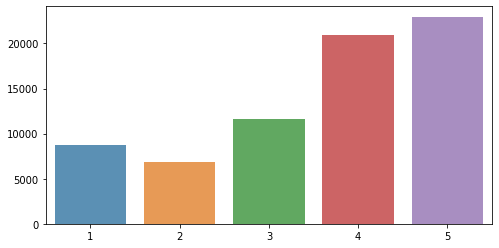

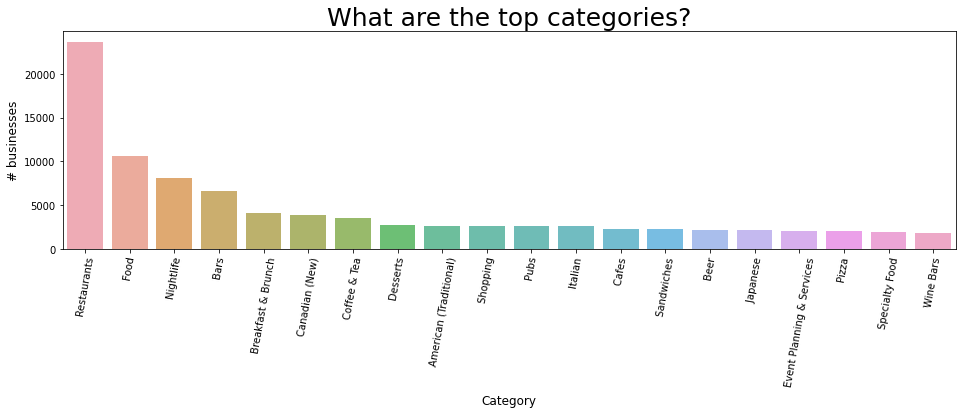

In [78]:
#data display
x=combined_business_data['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)

business_cats = ''.join(combined_business_data['categories'].astype('str'))
cats=pd.DataFrame(business_cats.split(','),columns=['categories'])
#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [79]:
#final necessary data
dataset=combined_business_data[['user_id', 'business_id', 'stars']]
dataset

,user_id,business_id,stars
0,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,4
1,Nq6e5N8bjgD9B46O4va_zA,qUWqjjjfpB2-4P3He5rsKw,4
2,wPLEzIlIUnTgc0lkJL_TmQ,qUWqjjjfpB2-4P3He5rsKw,4
3,TX5kwQLpKUDvNf4mfdaH3Q,qUWqjjjfpB2-4P3He5rsKw,5
4,fSYQ_oQ0wNGk2nMJLvNZJA,qUWqjjjfpB2-4P3He5rsKw,5
...,...,...,...
71005,ZSRZX2f5gthi9e2TwSBKZA,zY9VIy1JlLsOpBgKeMbXQQ,5
71006,p8Pjhqm4dopSUdnMN5_6Uw,kQOG4qVQCNiUXFfMGpI0Rw,5
71007,vJGLEHyhCs9V-5fAe-xx3w,E9K1wSwr-3y7TIaVaoa-9g,2
71008,4yQtGuSUtHhQTcWFrD2Lnw,fFKbj19pBWMQosCn9qsTdw,5


In [80]:
#convert id to number
dictionary_user=dict(zip(list(dataset['user_id'].drop_duplicates().values), range(len(dataset['user_id'].drop_duplicates().values))))
dictionary_business=dict(zip(list(dataset['business_id'].drop_duplicates().values), range(len(dataset['business_id'].drop_duplicates().values))))
user_set=[]
for user in dataset['user_id']:
  user_set.append(dictionary_user[user]+1)
business_set=[]
for business in dataset['business_id']:
  business_set.append(dictionary_business[business]+1)
dataset['user_id']=user_set
dataset['business_id']=business_set
dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,user_id,business_id,stars
0,1,1,4
1,2,1,4
2,3,1,4
3,4,1,5
4,5,1,5
...,...,...,...
71005,35090,3523,5
71006,17647,3524,5
71007,6290,3525,2
71008,24585,3526,5


In [81]:
#store the dataset and then read it 
dataset.to_csv('rating.csv',header=0,index=0)
pd.read_csv('rating.csv')

,1,1.1,4
0,2,1,4
1,3,1,4
2,4,1,5
3,5,1,5
4,6,1,5
...,...,...,...
71004,35090,3523,5
71005,17647,3524,5
71006,6290,3525,2
71007,24585,3526,5


In [82]:
#!git clone https://github.com/Zinc-30/social-recommendation-using-matrix-factorization.git